## Linear Regression from Scratch for Flight Price Prediction

In [ ]:
## Import relevant libraries
##Import required libraries 
##(not allowed: scikit-learn or any other libraries with inbuilt functions that help to implement ML methods).

import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import math
import pickle
import random
from numpy.linalg import inv
import seaborn as sns

In [2]:
#Read, preprocess, and print the main statistics about the dataset (you can reuse
##the code from Assignment 0 with a proper citation)


## Reading the data 
flight_df = pd.read_csv("flight_price_prediction.csv")

print(flight_df.shape)
## preprocess

## 1. Removing null values

print(f'Initial number of nulls in the dataset : {flight_df.isnull().values.sum()}')
flight_df.dropna(axis=0, inplace=True)
print(f'New number of nulls in the dataset: {flight_df.isnull().values.sum()} \n')

print("The stats of the numerical values are as follows:")



(300153, 12)
Initial number of nulls in the dataset : 0
New number of nulls in the dataset: 0 

The stats of the numerical values are as follows:


In [3]:
flight_df = flight_df[['airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price']]

##letting go of index column

In [4]:
flight_df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [5]:
flight_df.dtypes

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [6]:
##Let's see unique value of categorical data

print("Unique Value of airline")
print(flight_df["airline"].unique())
print("Unique Value of flight")
print(flight_df["flight"].unique())
print("Unique Value of source_city")
print(flight_df["source_city"].unique())
print("Unique Value of departure_time")
print(flight_df["departure_time"].unique())
print("Unique Value of stops")
print(flight_df["stops"].unique())
print("Unique Value of arrival_time")
print(flight_df["arrival_time"].unique())
print("Unique Value of destination_city")
print(flight_df["destination_city"].unique())
print("Unique Value of class")
print(flight_df["class"].unique())

Unique Value of airline
['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Unique Value of flight
['SG-8709' 'SG-8157' 'I5-764' ... '6E-7127' '6E-7259' 'AI-433']
Unique Value of source_city
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Unique Value of departure_time
['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Unique Value of stops
['zero' 'one' 'two_or_more']
Unique Value of arrival_time
['Night' 'Morning' 'Early_Morning' 'Afternoon' 'Evening' 'Late_Night']
Unique Value of destination_city
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']
Unique Value of class
['Economy' 'Business']


In [7]:
flight_df.describe() ##Printing Main Stats

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


<BarContainer object of 6 artists>

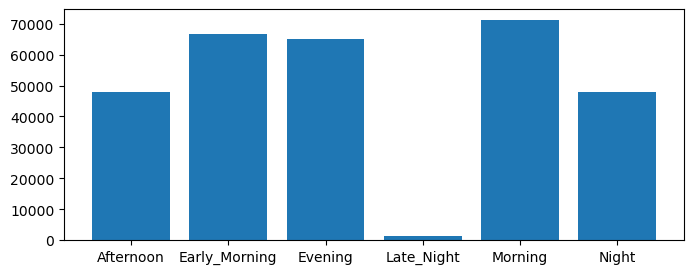

In [8]:
departure_info = flight_df["departure_time"].to_frame()
departure_info.head()
departure_info = departure_info.groupby("departure_time").value_counts().to_frame(name="count")
departure_info.reset_index(inplace=True)

plt.figure(figsize=(8, 3))
plt.bar(departure_info["departure_time"], departure_info["count"])


In [9]:
departure_delhi = flight_df[flight_df["source_city"] == "Delhi"]
departure_Mumbai = flight_df[flight_df["source_city"] == "Mumbai"] 
departure_Bangalore = flight_df[flight_df["source_city"] == "Bangalore"]
departure_Kolkata = flight_df[flight_df["source_city"] == "Kolkata"]
departure_Hyderabad = flight_df[flight_df["source_city"] == "Hyderabad"]
departure_Chennai = flight_df[flight_df["source_city"] == "Chennai"]

departure_delhi = departure_delhi["departure_time"].to_frame()
departure_delhi = departure_delhi.groupby("departure_time").value_counts().to_frame(name="count")
departure_delhi.reset_index(inplace=True)
departure_delhi.head()

departure_Mumbai = departure_Mumbai["departure_time"].to_frame()
departure_Mumbai = departure_Mumbai.groupby("departure_time").value_counts().to_frame(name="count")
departure_Mumbai.reset_index(inplace=True)

departure_Bangalore = departure_Bangalore["departure_time"].to_frame()
departure_Bangalore = departure_Bangalore.groupby("departure_time").value_counts().to_frame(name="count")
departure_Bangalore.reset_index(inplace=True)

departure_Kolkata = departure_Kolkata["departure_time"].to_frame()
departure_Kolkata = departure_Kolkata.groupby("departure_time").value_counts().to_frame(name="count")
departure_Kolkata.reset_index(inplace=True)

departure_Hyderabad = departure_Hyderabad["departure_time"].to_frame()
departure_Hyderabad = departure_Hyderabad.groupby("departure_time").value_counts().to_frame(name="count")
departure_Hyderabad.reset_index(inplace=True)

departure_Chennai = departure_Chennai["departure_time"].to_frame()
departure_Chennai = departure_Chennai.groupby("departure_time").value_counts().to_frame(name="count")
departure_Chennai.reset_index(inplace=True)


In [10]:
departure_Mumbai

,departure_time,count
0,Afternoon,10486
1,Early_Morning,14955
2,Evening,13082
3,Late_Night,268
4,Morning,12606
5,Night,9499


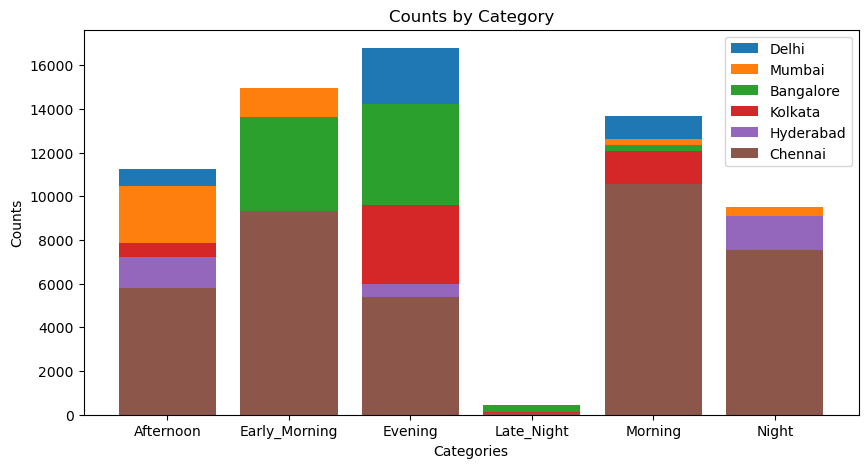

In [11]:
##For PLotting
dptime = departure_Mumbai["departure_time"].unique()
Delhi = departure_delhi["count"].tolist()
Mumbai = departure_Mumbai["count"].tolist()
Bangalore = departure_Bangalore["count"].tolist()
Kolkata = departure_Kolkata["count"].tolist()
Hyderabad = departure_Hyderabad["count"].tolist()
Chennai = departure_Chennai["count"].tolist()
plt.figure(figsize = (10,5))


# Creatng a stacked bar chart
plt.bar(dptime, Delhi, label='Delhi')
plt.bar(dptime, Mumbai,  label='Mumbai')
plt.bar(dptime, Bangalore, label='Bangalore')
plt.bar(dptime, Kolkata, label='Kolkata')
plt.bar(dptime, Hyderabad,  label='Hyderabad')
plt.bar(dptime, Chennai,  label='Chennai')

# Addng labels and legend
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Counts by Category')
plt.legend()


plt.show()


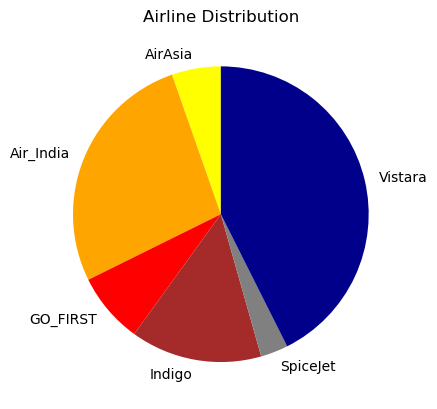

In [12]:
##Pie Chart
airline_info = flight_df["airline"].to_frame()
airline_info = airline_info.groupby("airline").value_counts().to_frame(name="count")
airline_info.reset_index(inplace=True)

sizes = airline_info["count"].to_list()
labels = airline_info["airline"].to_list()
colors = ["yellow", "orange", "red", "brown", "gray", "darkblue"]


plt.pie(sizes, labels=labels, colors=colors, startangle=90)


plt.title('Airline Distribution')


plt.show()


In [13]:
flight_df.dtypes  ##dtype of all columns

airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [14]:
economy = flight_df[flight_df["class"]=="Economy"]
business = flight_df[flight_df["class"]=="Business"]

##updated datatypes

In [15]:
flight_df["airline"].to_frame().groupby("airline").value_counts() ##updated datatypes
company_dict = {}
for idx, company in enumerate(flight_df["airline"].unique()):
    
    company_dict[company] =idx
company_dict

{'SpiceJet': 0,
 'AirAsia': 1,
 'Vistara': 2,
 'GO_FIRST': 3,
 'Indigo': 4,
 'Air_India': 5}

In [16]:
flight_df.replace(company_dict, inplace=True)

In [17]:
source_dict = {}

for idx, city in enumerate(flight_df["source_city"].unique()):
    source_dict[city] =idx
flight_df.replace(source_dict, inplace=True)##updated datatypes

In [18]:
departure_dict = {}

for idx, dept in enumerate(flight_df["departure_time"].unique()):
    departure_dict[dept] =idx##updated datatypes
flight_df.replace(departure_dict,inplace=True)

In [19]:
stops_dict = {}

for idx, stp in enumerate(flight_df["stops"].unique()):
    
    stops_dict[stp] =idx
flight_df.replace(stops_dict, inplace=True)

In [20]:
flight_df.dtypes  ##updated datatypes

airline               int64
flight               object
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

In [21]:
class_dict = {}

for idx, stp in enumerate(flight_df["class"].unique()):
    
    class_dict[stp] =idx
flight_df.replace(class_dict, inplace=True)

<AxesSubplot:>

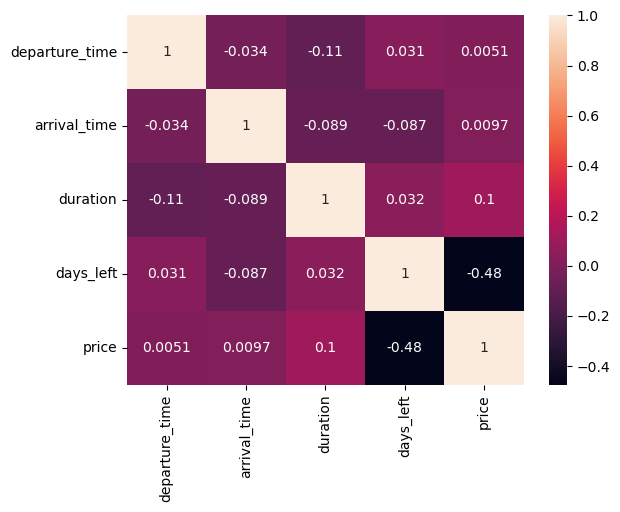

In [73]:
corr = flight_df.corr()  ##corr matrx
sns.heatmap(corr, annot=True)


In [23]:
Q1 = flight_df.quantile(0.25)
Q3 = flight_df.quantile(0.75)
IQR = Q3 - Q1
flight_df = flight_df[~((flight_df < (Q1 - 1.5 * IQR)) | (flight_df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\mancy\AppData\Local\Temp\ipykernel_4816\1890439832.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  flight_df = flight_df[~((flight_df < (Q1 - 1.5 * IQR)) | (flight_df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [24]:
q_low = flight_df["price"].quantile(0.30)
q_hi  = flight_df["price"].quantile(0.60)

df_filtered = flight_df[(flight_df["price"] < q_hi) & (flight_df["price"] > q_low)]

In [25]:
df_filtered.describe()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,74814.000000,74814.000000,74814.000000,74814.0,74814.000000,74814.000000,74814.0,74814.000000,74814.000000,74814.000000
mean,2.995509,2.201633,1.861283,1.0,2.261903,2.217526,0.0,13.393218,24.081028,7649.026733
std,1.421409,1.588059,1.350058,0.0,1.690328,1.612950,0.0,6.384143,13.360662,1841.134394
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,3.080000,1.000000,5624.000000
25%,2.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.0,8.250000,13.000000,6163.000000
50%,2.000000,2.000000,2.000000,1.0,2.000000,2.000000,0.0,12.000000,23.000000,6905.000000
75%,4.000000,3.000000,3.000000,1.0,4.000000,3.000000,0.0,16.920000,36.000000,8936.000000
max,5.000000,5.000000,5.000000,1.0,5.000000,5.000000,0.0,30.170000,49.000000,12028.000000


In [26]:
flight_df  = df_filtered.copy()

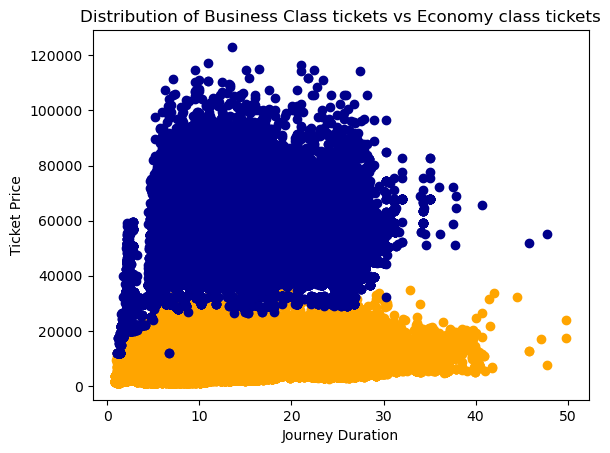

In [27]:

x = economy["duration"].to_list()
y = economy["price"].to_list()

a = business["duration"].to_list()
b = business["price"].to_list()


# scatter plot
plt.scatter(x, y, color="orange")
plt.scatter(a, b, color="darkblue")

# Adding axis labels and title
plt.xlabel('Journey Duration')
plt.ylabel('Ticket Price')
plt.title('Distribution of Business Class tickets vs Economy class tickets')


plt.show()


In [28]:
flight_df_price_days_duration =  flight_df[["duration","days_left","price"]]

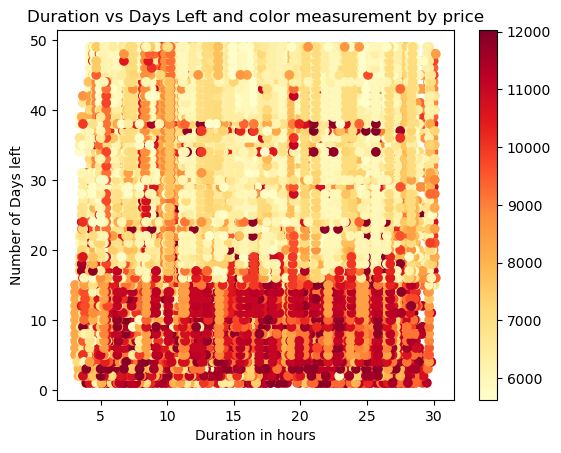

In [29]:
x = flight_df_price_days_duration["duration"].to_list()
y = flight_df_price_days_duration["days_left"].to_list()
z = flight_df_price_days_duration["price"].to_list()

fig, ax = plt.subplots()
im = ax.scatter(x, y, c=z, cmap='YlOrRd')

cbar = ax.figure.colorbar(im, ax=ax)

ax.set_title('Duration vs Days Left and color measurement by price')
ax.set_xlabel('Duration in hours')
ax.set_ylabel('Number of Days left')


plt.show()


In [30]:
print("Statstics of numerical data")
flight_df.describe()

Statstics of numerical data


,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,74814.000000,74814.000000,74814.000000,74814.0,74814.000000,74814.000000,74814.0,74814.000000,74814.000000,74814.000000
mean,2.995509,2.201633,1.861283,1.0,2.261903,2.217526,0.0,13.393218,24.081028,7649.026733
std,1.421409,1.588059,1.350058,0.0,1.690328,1.612950,0.0,6.384143,13.360662,1841.134394
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,3.080000,1.000000,5624.000000
25%,2.000000,1.000000,1.000000,1.0,0.000000,1.000000,0.0,8.250000,13.000000,6163.000000
50%,2.000000,2.000000,2.000000,1.0,2.000000,2.000000,0.0,12.000000,23.000000,6905.000000
75%,4.000000,3.000000,3.000000,1.0,4.000000,3.000000,0.0,16.920000,36.000000,8936.000000
max,5.000000,5.000000,5.000000,1.0,5.000000,5.000000,0.0,30.170000,49.000000,12028.000000


In [31]:
#flight_df["airline"].to_frame().groupby("airline").value_counts()

In [32]:
# company_dict = {}
# for idx, company in enumerate(flight_df["airline"].unique()):
#     company_dict[company] =idx

In [33]:
# company_dict

In [34]:
# flight_df.replace(company_dict, inplace=True)

In [35]:
# source_dict = {}

# for idx, city in enumerate(flight_df["source_city"].unique()):
#     source_dict[city] =idx

In [36]:
# flight_df.replace(source_dict, inplace=True)

In [37]:
departure_dict = {}

for idx, dept in enumerate(flight_df["departure_time"].unique()):
    departure_dict[dept] =idx
flight_df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
18,1,I5-747,0,0,1,1,1,0,12.25,1,5949
19,1,I5-747,0,0,1,2,1,0,16.33,1,5949
20,3,G8-266,0,1,1,0,1,0,11.75,1,5954
21,3,G8-101,0,1,1,4,1,0,14.50,1,5954
22,3,G8-103,0,0,1,2,1,0,15.67,1,5954
...,...,...,...,...,...,...,...,...,...,...,...
206661,2,UK-832,5,1,1,4,4,0,13.83,49,7697
206662,2,UK-832,5,1,1,4,4,0,13.83,49,7709
206663,2,UK-826,5,3,1,2,4,0,20.58,49,8640
206664,2,UK-822,5,2,1,2,4,0,23.33,49,8640


In [38]:
#flight_df.replace(departure_dict,inplace=True)

In [39]:
# stops_dict = {}

# for idx, stp in enumerate(flight_df["stops"].unique()):
#     stops_dict[stp] =idx

In [40]:
# flight_df.replace(stops_dict,inplace=True)

In [41]:
# flight_df = flight_df.drop(columns=["flight"])

In [42]:
# class_dict= {}

# for idx, class_type in enumerate(flight_df["class"].to_list()):
#     class_dict[class_type] = idx 

In [43]:
# flight_df.replace(class_dict,inplace=True)
# flight_df

In [44]:
flight_df.dtypes

airline               int64
flight               object
source_city           int64
departure_time        int64
stops                 int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

In [45]:
flight_df = flight_df.drop(["airline", "stops"  ] , axis=1)

In [46]:
flight_df = flight_df.drop(["flight"] , axis=1)

In [47]:
flight_df.dtypes

source_city           int64
departure_time        int64
arrival_time          int64
destination_city      int64
class                 int64
duration            float64
days_left             int64
price                 int64
dtype: object

In [48]:
flight_df = flight_df.drop(["class"] , axis=1)
flight_df = flight_df.drop(["source_city", "destination_city"] , axis=1)

In [49]:
for column in flight_df.columns:
    if column=="price":
        continue

    flight_df[column] = (flight_df[column] - flight_df[column].min()) / (flight_df[column].max() - flight_df[column].min())    


In [50]:
flight_df.dropna(inplace=True)
flight_df

,departure_time,arrival_time,duration,days_left,price
18,0.0,0.2,0.338501,0.0,5949
19,0.0,0.4,0.489110,0.0,5949
20,0.2,0.0,0.320044,0.0,5954
21,0.2,0.8,0.421558,0.0,5954
22,0.0,0.4,0.464747,0.0,5954
...,...,...,...,...,...
206661,0.2,0.8,0.396825,1.0,7697
206662,0.2,0.8,0.396825,1.0,7709
206663,0.6,0.4,0.645995,1.0,8640
206664,0.4,0.4,0.747508,1.0,8640


In [51]:
flight_df  =flight_df[:10000]

<h2> Choosing the target Variable </h2>
Here I am choosing Target variable as "price" --> making this a regression problem

In [52]:
def train_test_split(df, random_state=42):
    split_percent = 0.8
    random.seed(random_state)
    
    train=df.sample(frac=split_percent,random_state=random_state).copy()
    test=df.drop(train.index).copy()
    
    train_x  = train.loc[:, train.columns != "price"]
    train_y = train.loc[:, train.columns == "price"]
    
    
    test_x  = test.loc[:, test.columns != "price"]
    test_y = test.loc[:, test.columns == "price"]
    
    train_x= train_x.reset_index(drop=True)
    train_y = train_y.reset_index(drop=True)
    test_x = test_x.reset_index(drop=True)
    test_y = test_y.reset_index(drop=True)    

    return train_x.iloc[0:].values, train_y[["price"]].iloc[0:].values, test_x.iloc[0:].values, test_y[["price"]].iloc[0:].values
    
train_X, train_y, test_X, test_y = train_test_split(flight_df)

In [53]:
print(f"Shape of train_X {train_X.shape}\nShape of train_y {train_y.shape}\nShape of test_X {test_X.shape}\nShape of test_y {test_y.shape}  ")

Shape of train_X (8000, 4)
Shape of train_y (8000, 1)
Shape of test_X (2000, 4)
Shape of test_y (2000, 1)  


In [54]:
class LinearRegression:
    def __init__(self):
        self.wt = None
        self.bias = None
        
    def calculate_ols(self, X,y, W) : 
        N,d = X.shape
        ##w = xt_x
        X_transpose = np.transpose(X)  ##AS PER FORMULAE IN ASSIGNMENT
        xt_x = np.dot(X_transpose,X)
        inv_xt_x = np.linalg.pinv(xt_x)
        inv_xt_x_xt = np.dot(inv_xt_x, X_transpose)
        res = np.dot(inv_xt_x_xt,y)
        return res
        
    def fit(self,X,y):
        random.seed(42)
        X = np.vstack((np.ones((X.shape[0], )), X.T)).T ## ##Adjusting for bias = 1
        
        N,d = X.shape
        
        W = np.random.uniform(0, 1, size=(1,d))
        W = np.vstack((np.ones((W.shape[0], )), W.T)).T  ##Adjusting for bias = 1
        
        W = self.calculate_ols(X,y,W)
        self.bias = W[0]
        self.wt = W[1:]
        return self.bias , self.wt
    
    
    def predict(self, X):
        y_pred = np.dot(X,self.wt) + self.bias
        print(y_pred)
        return y_pred
    
    def MSE(self, test_y, pred_y):
        acc = sum(np.square(test_y - pred_y))
        return np.divide(acc, test_y.shape[0])[0]
    
        

In [55]:
lr = LinearRegression()

In [56]:
weghts  = lr.fit(train_X, train_y)

In [57]:
weghts[0]

array([8820.31723395])

In [58]:
best_score = {
    
    "weight":weghts[0],
    "bias" : weghts[1:],
    "step" : "nonridge"
}


In [59]:
y_pred = lr.predict(test_X)

[[9221.32272749]
 [9198.97427031]
 [8747.69087435]
 ...
 [8407.60759484]
 [8596.50204925]
 [8657.37853128]]


In [60]:
lr.MSE(test_y, y_pred)

2633937.546977236

In [61]:
y_pred

array([[9221.32272749],
       [9198.97427031],
       [8747.69087435],
       ...,
       [8407.60759484],
       [8596.50204925],
       [8657.37853128]])

In [62]:
test_y

array([[5949],
       [5954],
       [5955],
       ...,
       [8433],
       [8433],
       [8318]], dtype=int64)

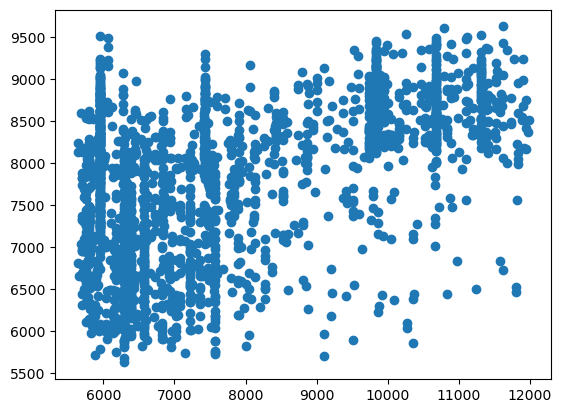

In [63]:
plt.scatter(test_y, y_pred)

<h2> Predicting via ridge Regression </h2>

In [64]:
class LinearRegression1:
    def __init__(self, lmda=0.5):
        self.wt = None
        self.bias = None
        self.lmda = lmda   ### Adding lambda value
        
    def calculate_ridge(self, X,y, W) : 
        N,d = X.shape  ##this X has 1 adjusted for bias
        I = np.identity(d)
        lmda_I = np.dot(self.lmda, I)
        ##w = xt_x
        X_transpose = np.transpose(X)
        xt_x = np.dot(X_transpose,X)
        xt_x_I = xt_x + lmda_I
        inv_xt_x = inv(xt_x_I)
        inv_xt_x_xt = np.dot(inv_xt_x, X_transpose)
        res = np.dot(inv_xt_x_xt,y)
        return res
        
    def fit(self,X,y):
        random.seed(42)
        X = np.vstack((np.ones((X.shape[0], )), X.T)).T ## ##Adjusting for bias = 1
        N,d = X.shape
        W = np.random.uniform(0, 1, size=(1,d))
        W = np.vstack((np.ones((W.shape[0], )), W.T)).T  ##Adjusting for bias = 1
        W = self.calculate_ridge(X,y,W)
        self.bias = W[0]
        self.wt = W[1:]
        return self.bias , self.wt
    
    
    def predict(self, X):
        y_pred = np.dot(X,self.wt) + self.bias
        print(y_pred)
        return y_pred
    
    def MSE(self, test_y, pred_y):
        acc = sum(np.square(test_y - pred_y))
        return np.divide(acc, test_y.shape[0])[0]
    
        

In [65]:
ridge_lr =  LinearRegression1(0.001)

In [66]:
wts = ridge_lr.fit(train_X, train_y)

In [67]:
best_score_rdge = {
    
    "bias":wts[0],
    "weight" : wts[1:],
    "step" : "ridge"
}

In [68]:
ridge_lr.MSE(test_y, y_pred)

2633937.546977236

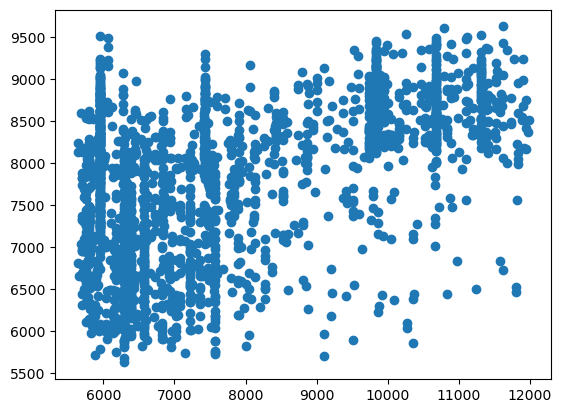

In [69]:
plt.scatter(test_y, y_pred)

In [70]:
with open('Mancy_assignment1_part2.pickle', 'wb') as file:
    pickle.dump(best_score, file)

    

In [71]:
with open('Mancy_assignment1_part3.pickle', 'wb') as file:
    pickle.dump(best_score_rdge, file)

In [72]:
with open('Mancy_assignment1_part3.pickle', 'rb') as handle:
    b = pickle.load(handle)
print(b)

{'bias': array([8820.30514871]), 'weight': (array([[  207.18394225],
       [ -119.13610684],
       [  917.30793874],
       [-3187.80094304]]),), 'step': 'ridge'}


<h2> References </h2>
<ol>
- https://www.youtube.com/watch?v=erfeZg27B7A 
- https://hbr.org/2015/11/a-refresher-on-regression-analysis 
- https://www.geeksforgeeks.org/normalize-a-column-in-pandas/
- https://www.tutorialspoint.com/how-to-select-all-columns-except-one-in-a-pandas-dataframe
- https://www.w3schools.com/python/ref_math_e.asp
- https://numpy.org/doc/stable/reference/generated/numpy.zeros.html
- https://pandas.pydata.org/docs/reference/api/pandas.isnull.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

</ol>